In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
import random

## Load Data and Define Functions

In [2]:
#Load Customer profiles
customer_profiles = pd.read_csv('Customer_Profiles.csv')
customer_profiles.set_index('Customer_Cluster', inplace = True)
customer_profiles = customer_profiles.loc[:, ~customer_profiles.columns.str.contains('^Unnamed')]
customer_profiles.head()

,Gender,Style,Blouses,Dresses,Jackets & Coats,Jeans,Jumpers,Polos,Shirts,Shorts,Skirts,Suits,Trousers,T-Shirts
Customer_Cluster,,,,,,,,,,,,,,
1.0,Mens,Casual,0.0,0.0,0.1,0.20,0.10,0.10,0.00,0.20,0.0,0.0,0.00,0.30
2.0,Mens,Casual,0.0,0.0,0.2,0.15,0.15,0.00,0.05,0.10,0.0,0.0,0.00,0.35
3.0,Mens,Casual,0.0,0.0,0.1,0.20,0.15,0.20,0.05,0.10,0.0,0.0,0.00,0.20
4.0,Mens,Casual,0.0,0.0,0.2,0.00,0.10,0.15,0.10,0.15,0.0,0.0,0.15,0.15
5.0,Mens,Casual,0.0,0.0,0.0,0.25,0.00,0.20,0.00,0.20,0.0,0.0,0.00,0.35


In [3]:
#Load Shop Profiles
shop_profiles = pd.read_csv('Shop_Profiles.csv')
shop_profiles.set_index('Shop_Cluster', inplace = True)
shop_profiles = shop_profiles.loc[:, ~shop_profiles.columns.str.contains('^Unnamed')]
shop_profiles.head()

,Gender,Style,Adidas,CalvinKleinMen,CalvinKleinPerformance,CalvinKleinWomen,Max&Co,MaxMara,Muji,Nike,Brooks Brothers,Boss,Fred Perry,Saint Laurent,Uniqlo,Moncler,Ralph_Lauren
Shop_Cluster,,,,,,,,,,,,,,,,,
1,Mens,Casual,0.1,0.15,0.1,0.00,0.0,0.00,0.10,0.15,0.0,0.0,0.1,0.05,0.15,0.0,0.1
2,Womens,Casual,0.1,0.00,0.1,0.15,0.1,0.00,0.10,0.10,0.0,0.0,0.1,0.00,0.15,0.0,0.1
3,Mens,Casual,0.1,0.15,0.1,0.00,0.0,0.00,0.15,0.05,0.1,0.0,0.1,0.05,0.20,0.0,0.0
4,Womens,Casual,0.1,0.00,0.1,0.15,0.1,0.15,0.10,0.00,0.0,0.0,0.1,0.00,0.20,0.0,0.0
5,Mens,Smart,0.0,0.10,0.0,0.00,0.0,0.00,0.00,0.00,0.2,0.1,0.1,0.10,0.00,0.2,0.2


In [4]:
#Load Product db
products = pd.read_csv('AllCombined.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.head()

,ID,Brand,Category,Gender,Name,Image URL,Price
0,1.0,Adidas,T-Shirts,Mens,HUMAN MADE GRAPHIC TEE,http://img.adidas.com.hk/resources/2021/4/13/1...,699.0
1,2.0,Adidas,T-Shirts,Mens,TREFOIL GRAPHIC PACK SHORT SLEEVE TEE,http://img.adidas.com.hk/resources/2021/3/30/1...,499.0
2,3.0,Adidas,T-Shirts,Mens,HEAT.RDY RUNNING TEE,http://img.adidas.com.hk/resources/2021/3/30/1...,329.0
3,4.0,Adidas,T-Shirts,Mens,DAME AVATAR POCKET TEE,http://img.adidas.com.hk/resources/2021/3/30/1...,269.0
4,5.0,Adidas,T-Shirts,Mens,ADICOLOR PREMIUM TEE (GENDER NEUTRAL),http://img.adidas.com.hk/resources/2021/3/30/1...,399.0


In [8]:
#Function to generate user history database
#Either appends to the existing user_df, or can create a new one if user_df input is empty
def generate_user_history_profiles(no_of_users, min_items, max_items, products_df = products, shop_profiles = shop_profiles, customer_profiles = customer_profiles, csv = 'new'):
#remove seeds when running multiple times, otherwise data will be the same between runs
    random.seed(10)
    np.random.seed(10) 
#load in new or existing df
    if csv == 'new':
        new_columns = ['User_ID']
        new_columns.extend(list(df.columns))
        user_df = pd.DataFrame(columns = new_columns)
    else:
        user_df = pd.read_csv(csv)
        user_df = user_df.loc[:, ~user_df.columns.str.contains('^Unnamed')]   
#Begin loop to create each user in df
    for user in range(no_of_users): 
    #Define User ID
        if len(user_df) == 0:
            user_id = 1
        else: 
            user_id = max(user_df['User_ID'])+1
    #Randomly assign gender and number of items bought by user
        gender_list = ['Mens', 'Womens']
        gender = gender_list[random.randint(0,1)]
        items_bought = random.randint(min_items, max_items)
    #Randomly select Customer_Cluster and Shop Cluster
        customer_cluster = customer_profiles[customer_profiles['Gender']==gender].sample(1)
        shop_cluster = shop_profiles[(shop_profiles['Style']==customer_cluster['Style'].values[0]) & (shop_profiles['Gender']==gender)].sample(1)
    #Calculate customer matrix using the Customer_cluster * Shop_cluster
        customer_np = np.array(customer_cluster.iloc[:,2:])
        shop_np = np.array(shop_cluster.iloc[:,2:])
        mat = np.zeros(shape=(shop_np.shape[1],customer_np.shape[1]))
        for row in range(0,shop_np.shape[1]):
            mat[row] = shop_np[0][row]*customer_np[0]
    # Save as dataframe
        customer_matrix = pd.DataFrame(mat, columns = customer_cluster.columns[2:])
        customer_matrix['Shop'] = shop_cluster.columns[2:]
        customer_matrix.set_index('Shop', inplace = True)
        customer_matrix = (customer_matrix*items_bought).round(0)
        for shop in customer_matrix.index:
            for category in customer_matrix.columns:
                try:
                    n = int(customer_matrix.at[shop, category])
                    dummy_df = products_df[(products_df['Brand']==shop) & (products_df['Category']==category) & (products_df['Gender']==gender)].sample(n + random.randint(-round(n/2,0), round(n/2,0)))
                    dummy_df['User_ID'] = user_id
                    dummy_df['Customer_Cluster'] = int(customer_cluster.index[0])
                    dummy_df['Shop_Cluster'] = int(shop_cluster.index[0])
                    user_df = user_df.append(dummy_df)
                except:
                    pass
        print(f'Completed user {user_id}\nItems Purchased: {items_bought}\nCustomer Cluster: {int(customer_cluster.index[0])}\nShop_Cluster: {int(shop_cluster.index[0])}\n')
    return user_df

## Generate User Shopping History

In [22]:
#Set parameters
no_of_users = 200
min_items = 10
max_items = 100

#Run Function to generate users
user_df = generate_user_history_profiles(no_of_users, min_items = 10, max_items = 100, products_df = products, shop_profiles = shop_profiles, customer_profiles = customer_profiles, csv = 'new')

Completed user 1
Items Purchased: 64
Customer Cluster: 3
Shop_Cluster: 1

Completed user 2
Items Purchased: 54
Customer Cluster: 4
Shop_Cluster: 1

Completed user 3
Items Purchased: 94
Customer Cluster: 15
Shop_Cluster: 6

Completed user 4
Items Purchased: 81
Customer Cluster: 17
Shop_Cluster: 6

Completed user 5
Items Purchased: 100
Customer Cluster: 17
Shop_Cluster: 6

Completed user 6
Items Purchased: 95
Customer Cluster: 13
Shop_Cluster: 5

Completed user 7
Items Purchased: 81
Customer Cluster: 21
Shop_Cluster: 8

Completed user 8
Items Purchased: 21
Customer Cluster: 11
Shop_Cluster: 5

Completed user 9
Items Purchased: 77
Customer Cluster: 2
Shop_Cluster: 1

Completed user 10
Items Purchased: 98
Customer Cluster: 15
Shop_Cluster: 6

Completed user 11
Items Purchased: 94
Customer Cluster: 20
Shop_Cluster: 7

Completed user 12
Items Purchased: 82
Customer Cluster: 22
Shop_Cluster: 8

Completed user 13
Items Purchased: 52
Customer Cluster: 14
Shop_Cluster: 5

Completed user 14
Items

In [23]:
#Save df to csv
user_df.to_csv('User_db.csv', index = False)

## Check Distributions of Generated Data

In [5]:
#Load csv file
user_df = pd.read_csv('User_db.csv')
user_df.head(2)

,User_ID,ID,Brand,Category,Gender,Name,Image URL,Price,Customer_Cluster,Shop_Cluster
0,1,33.0,Adidas,Jackets & Coats,Mens,CNY JACKET,http://img.adidas.com.hk/resources/2020/12/29/...,999.0,3.0,1.0
1,1,36.0,Adidas,Jumpers,Mens,ESSENTIALS EMBROIDERED SMALL LOGO SWEATSHIRT,http://img.adidas.com.hk/resources/2020/12/28/...,299.0,3.0,1.0


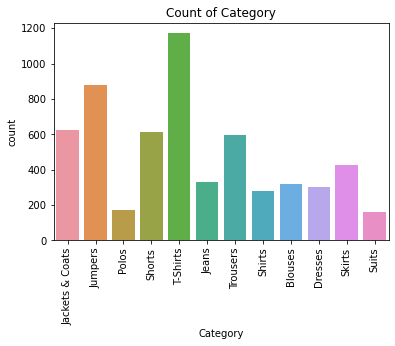

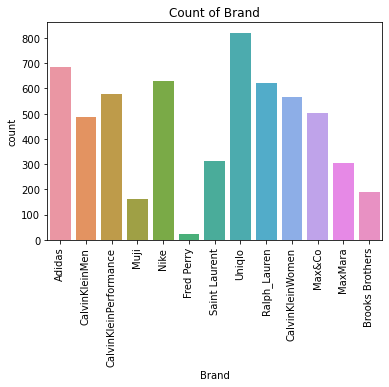

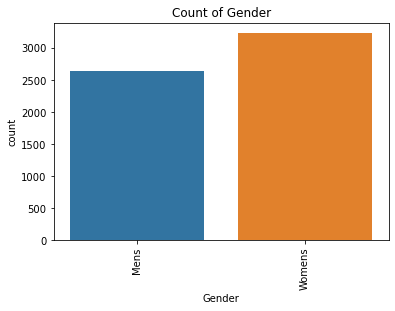

In [6]:
#Plot count of category / brand
for item in ['Category', 'Brand', 'Gender']:
    sns.countplot(data = user_df, x = item)
    plt.xticks(rotation = 90)
    plt.title(f'Count of {item}')
    plt.show()

<AxesSubplot:xlabel='Category', ylabel='Brand'>

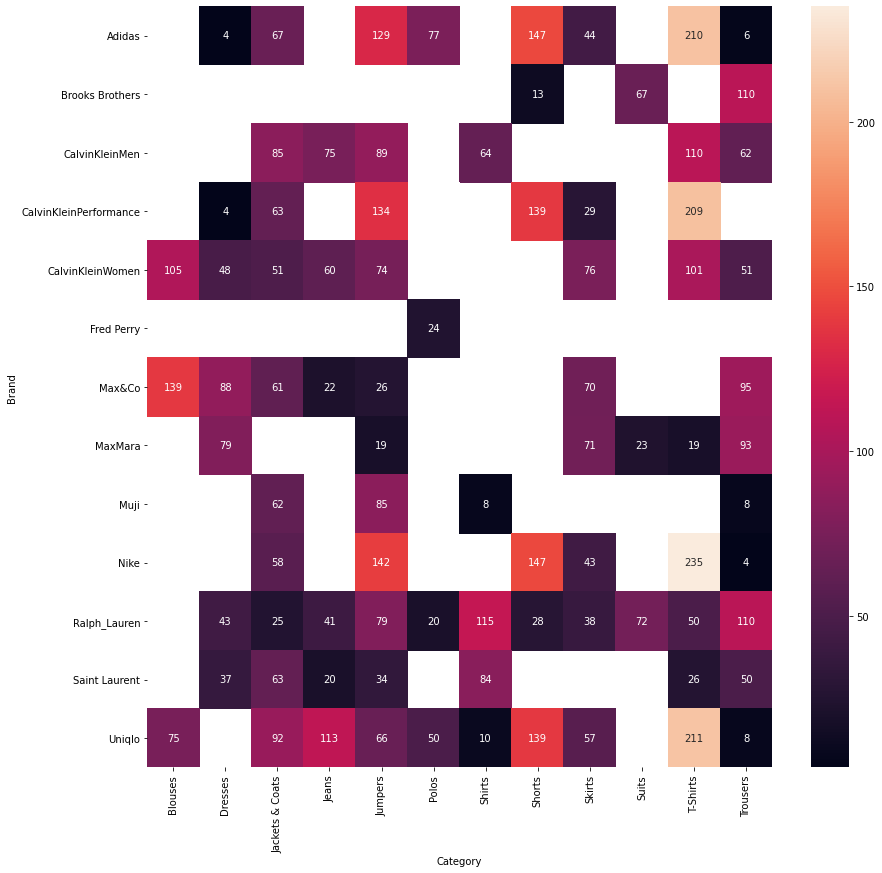

In [7]:
#Plot heatmap of brands/categories in the database
user_pivot = user_df.pivot_table(index = 'Brand', columns = 'Category', values = 'Name', aggfunc = 'count')
fig, ax = plt.subplots(figsize = (14,14))
sns.heatmap(ax = ax, data = user_pivot, annot = True, fmt = '.0f')

## Check Example User

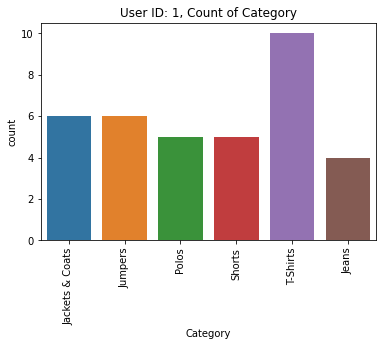

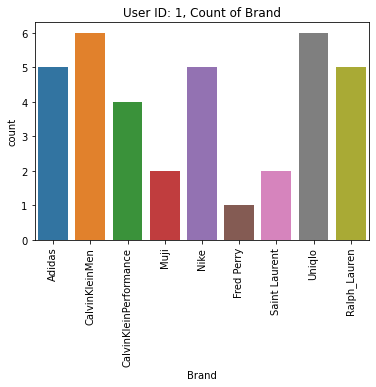

In [8]:
# Example user
example_user_id = 1

for item in ['Category', 'Brand']:
    sns.countplot(data = user_df[user_df['User_ID']==example_user_id], x = item)
    plt.title(f'User ID: {example_user_id}, Count of {item}')
    plt.xticks(rotation = 90)
    plt.show()

## Calculate User Brand/Category profiles

In [9]:
def create_user_shop_profile(user_df):
    #Create empty user_shop_profile df
    user_shop_profile = pd.DataFrame(columns = shop_profiles.columns[2:])
    user_shop_profile.insert(0, 'User_id',0)
    user_shop_profile.set_index(['User_id'], inplace = True)
    #Loop through users, calculate shop weights, append to user_shop_profile df
    for user_id in user_df['User_ID'].unique():
        subset = user_df[user_df['User_ID'] == user_id]
        shop_weights = subset['Brand'].value_counts()/sum(subset['Brand'].value_counts())
        user_weights = np.zeros(shape = 0)
        for brand in user_shop_profile.columns:
            try:
                user_weights = np.append(user_weights, shop_weights[brand])
            except:
                user_weights = np.append(user_weights, 0)
                pass
        user_shop_profile.loc[user_id] = user_weights
    return user_shop_profile

In [10]:
def create_user_product_profile(user_df):
    #Create empty user_shop_profile df
    user_product_profile = pd.DataFrame(columns = customer_profiles.columns[2:])
    user_product_profile.insert(0, 'User_id',0)
    user_product_profile.set_index(['User_id'], inplace = True)
    #Loop through users, calculate shop weights, append to user_shop_profile df
    for user_id in user_df['User_ID'].unique():
        subset = user_df[user_df['User_ID'] == user_id]
        product_weights = subset['Category'].value_counts()/sum(subset['Category'].value_counts())
        user_weights = np.zeros(shape = 0)
        for brand in user_product_profile.columns:
            try:
                user_weights = np.append(user_weights, product_weights[brand])
            except:
                user_weights = np.append(user_weights, 0)
                pass
        user_product_profile.loc[user_id] = user_weights
    return user_product_profile

In [11]:
#Calculate user_shop_profile
user_shop_profile = create_user_shop_profile(user_df)
user_shop_profile.head()

,Adidas,CalvinKleinMen,CalvinKleinPerformance,CalvinKleinWomen,Max&Co,MaxMara,Muji,Nike,Brooks Brothers,Boss,Fred Perry,Saint Laurent,Uniqlo,Moncler,Ralph_Lauren
User_id,,,,,,,,,,,,,,,
1,0.138889,0.166667,0.111111,0.000000,0.000000,0.000000,0.055556,0.138889,0.0,0.0,0.027778,0.055556,0.166667,0.0,0.138889
2,0.136364,0.159091,0.090909,0.000000,0.000000,0.000000,0.090909,0.159091,0.0,0.0,0.022727,0.022727,0.181818,0.0,0.136364
3,0.000000,0.000000,0.000000,0.234043,0.297872,0.234043,0.000000,0.000000,0.0,0.0,0.000000,0.085106,0.000000,0.0,0.148936
4,0.000000,0.000000,0.000000,0.222222,0.370370,0.185185,0.000000,0.000000,0.0,0.0,0.000000,0.148148,0.000000,0.0,0.074074
5,0.000000,0.000000,0.000000,0.166667,0.333333,0.250000,0.000000,0.000000,0.0,0.0,0.000000,0.145833,0.000000,0.0,0.104167


In [12]:
#Calculate user_product_profile
user_product_profile = create_user_product_profile(user_df)
user_product_profile.head()

,Blouses,Dresses,Jackets & Coats,Jeans,Jumpers,Polos,Shirts,Shorts,Skirts,Suits,Trousers,T-Shirts
User_id,,,,,,,,,,,,
1,0.000000,0.000000,0.166667,0.111111,0.166667,0.138889,0.000000,0.138889,0.000000,0.0,0.000000,0.277778
2,0.000000,0.000000,0.295455,0.000000,0.136364,0.090909,0.090909,0.113636,0.000000,0.0,0.136364,0.136364
3,0.127660,0.191489,0.212766,0.000000,0.000000,0.000000,0.000000,0.000000,0.255319,0.0,0.212766,0.000000
4,0.222222,0.185185,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.259259,0.0,0.259259,0.000000
5,0.229167,0.250000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.250000,0.0,0.208333,0.000000


In [13]:
#Combine shop and product profiles into 1 df
# This will be used in the distance matrix calculation
user_both_profile = pd.concat([user_shop_profile, user_product_profile], axis = 1)
user_both_profile

,Adidas,CalvinKleinMen,CalvinKleinPerformance,CalvinKleinWomen,Max&Co,MaxMara,Muji,Nike,Brooks Brothers,Boss,...,Jackets & Coats,Jeans,Jumpers,Polos,Shirts,Shorts,Skirts,Suits,Trousers,T-Shirts
User_id,,,,,,,,,,,,,,,,,,,,,
1,0.138889,0.166667,0.111111,0.000000,0.000000,0.000000,0.055556,0.138889,0.000000,0.0,...,0.166667,0.111111,0.166667,0.138889,0.000000,0.138889,0.000000,0.000000,0.000000,0.277778
2,0.136364,0.159091,0.090909,0.000000,0.000000,0.000000,0.090909,0.159091,0.000000,0.0,...,0.295455,0.000000,0.136364,0.090909,0.090909,0.113636,0.000000,0.000000,0.136364,0.136364
3,0.000000,0.000000,0.000000,0.234043,0.297872,0.234043,0.000000,0.000000,0.000000,0.0,...,0.212766,0.000000,0.000000,0.000000,0.000000,0.000000,0.255319,0.000000,0.212766,0.000000
4,0.000000,0.000000,0.000000,0.222222,0.370370,0.185185,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.259259,0.000000,0.259259,0.000000
5,0.000000,0.000000,0.000000,0.166667,0.333333,0.250000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.250000,0.000000,0.208333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.232143,0.000000,0.160714,0.160714,0.000000,0.000000,0.035714,0.250000,0.000000,0.0,...,0.000000,0.035714,0.339286,0.035714,0.000000,0.178571,0.000000,0.000000,0.000000,0.410714
191,0.000000,0.000000,0.000000,0.266667,0.066667,0.133333,0.000000,0.000000,0.000000,0.0,...,0.000000,0.133333,0.200000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.200000
192,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.0,...,0.000000,0.000000,0.272727,0.000000,0.272727,0.000000,0.000000,0.181818,0.272727,0.000000


## Calculate Distance Matrix

In [14]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [89]:
#Calculate distance matrix for products and shops
input_df = user_both_profile
distance_matrix = pd.DataFrame(
    squareform(pdist(input_df)),
    columns = input_df.index,
    index = input_df.index)
distance_matrix

User_id,1,2,3,4,5,6,7,8,9,10,...,185,186,187,188,189,190,191,192,193,194
User_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.288299,0.794358,0.866718,0.854138,0.770403,0.448952,0.953389,0.209772,0.818068,...,0.531783,0.457289,0.848614,1.284403,0.986209,0.440271,0.712888,0.736379,0.122136,0.773181
2,0.288299,0.000000,0.720491,0.819584,0.816127,0.696211,0.479011,0.892076,0.316042,0.751628,...,0.470094,0.598457,0.744121,1.276375,0.948166,0.579402,0.767023,0.668815,0.343381,0.643627
3,0.794358,0.720491,0.000000,0.281561,0.273303,0.849608,0.777169,0.964004,0.824263,0.123659,...,0.570403,0.927007,0.857453,1.202928,0.408797,0.935180,0.828162,0.842617,0.823389,0.788053
4,0.866718,0.819584,0.281561,0.000000,0.128967,0.888258,0.840949,1.004448,0.899562,0.276666,...,0.704404,0.948198,0.883374,1.142459,0.316783,0.955952,0.816967,0.843352,0.889655,0.823148
5,0.854138,0.816127,0.273303,0.128967,0.000000,0.881153,0.843557,0.996522,0.890103,0.241427,...,0.713218,0.951595,0.884801,1.154701,0.288675,0.958204,0.817177,0.843056,0.877131,0.831748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.440271,0.579402,0.935180,0.955952,0.958204,0.970931,0.399847,1.110689,0.421544,0.946093,...,0.690066,0.176938,1.078847,1.300755,1.062763,0.000000,0.720050,0.925880,0.394612,1.020940
191,0.712888,0.767023,0.828162,0.816967,0.817177,1.044436,0.763666,1.167143,0.702344,0.844252,...,0.652240,0.729444,1.116277,0.793025,0.904695,0.720050,0.000000,1.007666,0.701968,1.060416
192,0.736379,0.668815,0.842617,0.843352,0.843056,0.227964,0.911564,0.520913,0.782584,0.863389,...,0.882031,0.928213,0.354921,1.424404,1.024115,0.925880,1.007666,0.000000,0.783681,0.363636


In [114]:
def nearest_neighbour(user_id, user_df, distance_matrix):
    #Find nearest neighbour and their ID
    neighbours = distance_matrix.loc[user_id].sort_values(ascending = True)
    neighbour_id = neighbours.index[1]

    #subset_df = user_df[user_df['User_ID'].isin([user_id, neighbour_id])]
    bought_items = user_df[user_df['User_ID'] == user_id]['Name'].values

    # product df for neighbour with bought_items removed
    neighbour_df = user_df[user_df['User_ID'] == neighbour_id]
    neighbour_df = neighbour_df[~neighbour_df['Name'].isin(list(bought_items))]

    #Recommend Items
    recommend_df = pd.DataFrame(columns = neighbour_df.columns)
    for category in neighbour_df['Category'].unique():
        recommend_df = recommend_df.append(neighbour_df[neighbour_df['Category']==category].sample(1))
    recommend_df.drop(columns=['User_ID', 'ID', 'Customer_Cluster', 'Shop_Cluster'], inplace = True)
    return neighbour_id, recommend_df

In [118]:
# Run for an example user
user_id=1
neighbour_id, recommend_df = nearest_neighbour(user_id, user_df, distance_matrix)
print(neighbour_id)
recommend_df

193


,Brand,Category,Gender,Name,Image URL,Price
5845,Nike,Jackets & Coats,Mens,Men's Basketball Jacket,https://static.nike.com.hk/resources/product/C...,649.0
5844,Muji,Jumpers,Mens,Men's French Linen Crew Neck Sweater,http://img.muji.net/img/item/4550182715422_180...,NaN
5858,Uniqlo,Shorts,Mens,DRY STRETCH EASY SHORTS 423560,https://www.uniqlo.com.hk/hmall/test/u00000000...,7900
5841,CalvinKleinPerformance,T-Shirts,Mens,reflective logo graphic tee,https://images.demandware.net/dw/image/v2/ABAD...,390.0
5863,Ralph_Lauren,Jeans,Mens,Slim Fit Jean,https://uxawscdn.baozun.com/aws/96001096/20201...,1990
5852,Fred Perry,Polos,Mens,Tipped Placket Polo Shirt,https://d30l99xc13l2t1.cloudfront.net/media/ca...,£70


## Plot Recommended Items and User Similarities

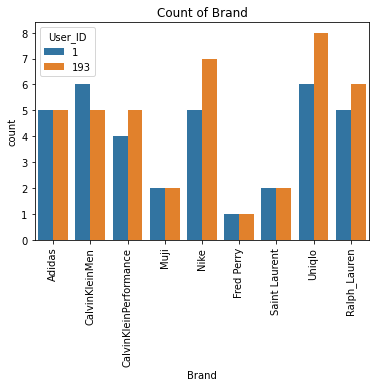

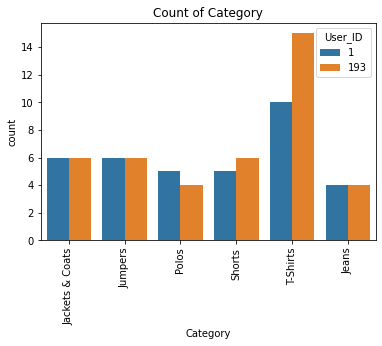

In [111]:
#Plot shop profiles
#fig, ax = plt.subplots(nrows = 1, ncols = 2)
subset = user_df[user_df['User_ID'].isin([1,193])]
for item in ['Brand', 'Category']:
    sns.countplot(data = subset, x = item, hue = 'User_ID')
    plt.title(f'Count of {item}')
    plt.xticks(rotation = 90)
    plt.show()

In [70]:
# Function to print sample images from users
def print_user_images(user_list, n_items, user_df, headers):
    subset = user_df[user_df['User_ID'].isin(user_list)]
    for item in subset['Category'].unique():
        plt.figure(figsize=(20, 10))
        print(item)
        for user in user_list:
            user_subset = subset[(subset['User_ID']==user) & (subset['Category']==item)].sample(n_items)
            for i in range(n_items):
                ax = plt.subplot(1,2*n_items,users.index(user)*n_items + i + 1)
                url = user_subset['Image URL'].values[i]
                try:
                    im = Image.open(io.BytesIO(requests.get(url, stream=True, headers = headers).content))
                    plt.imshow(im)
                    plt.axis('off')
                    plt.title(f'User: {user}')
                except:
                    pass
        plt.show()

Jackets & Coats


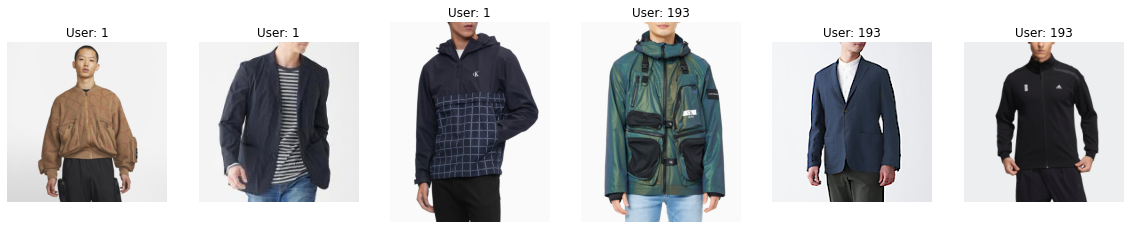

Jumpers


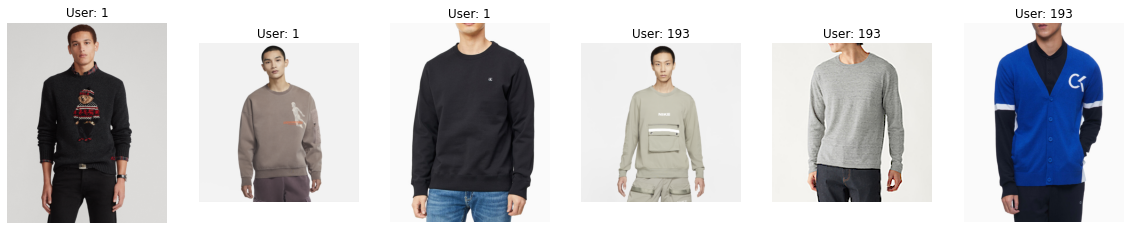

Polos


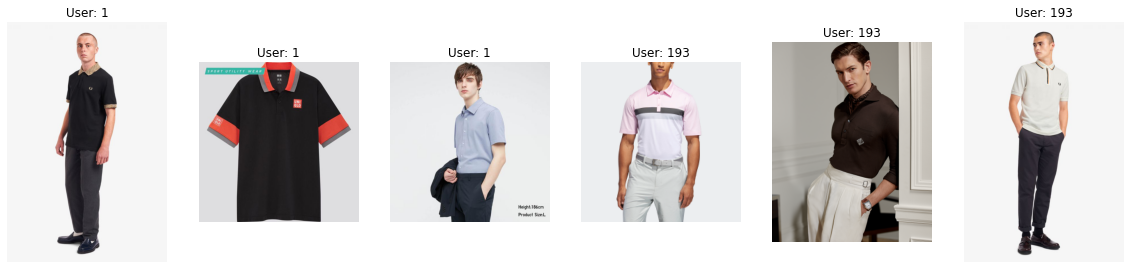

Shorts


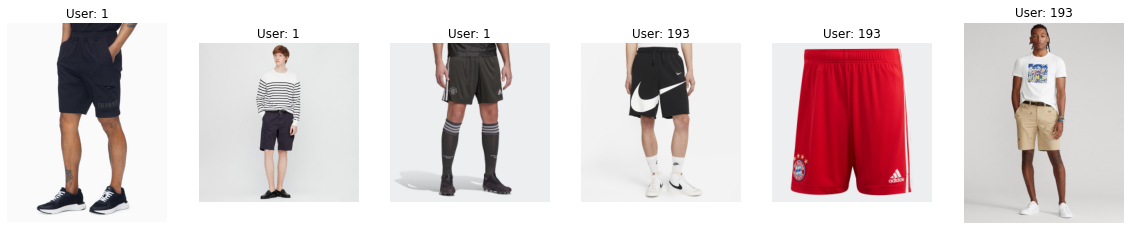

T-Shirts


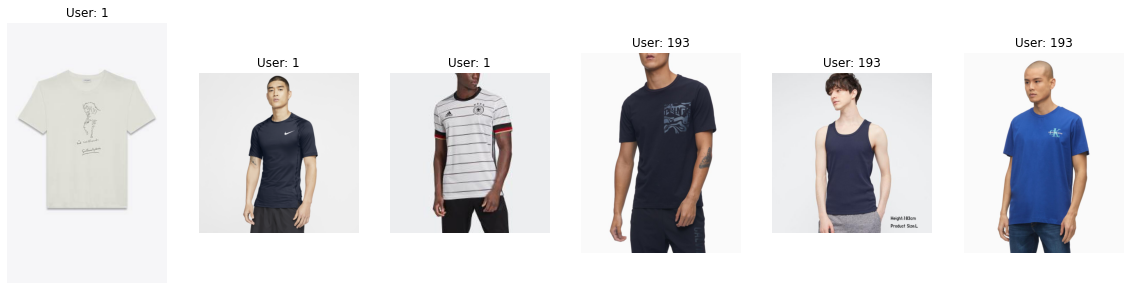

Jeans


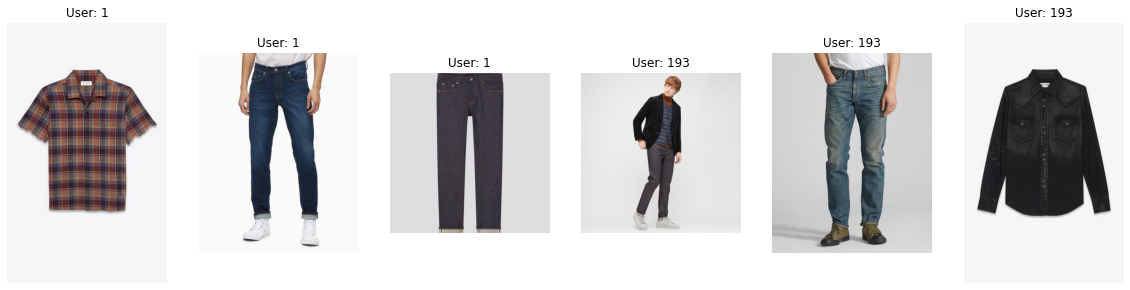

In [73]:
#Define Parameters
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36'}
user_list = [example_user_id, neighbours.index[1]]
n_items = 3
#Run Function
print_user_images(user_list, n_items, user_df, headers)

Recommended Items:
<ipython-input-162-3e0983c6f8d3>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, round(len(recommend_df)/2,0), i + 1)


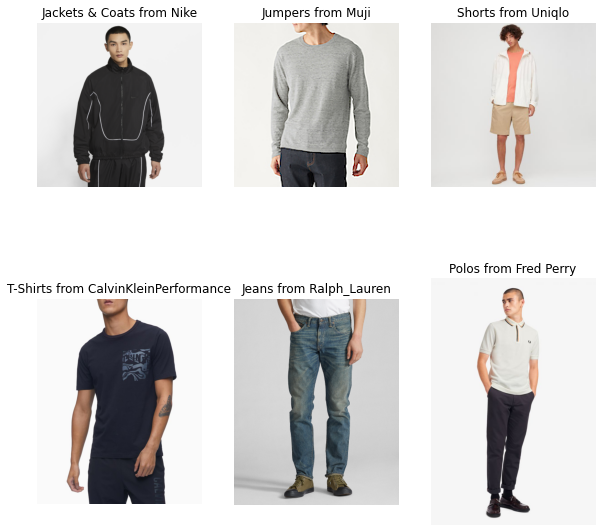

In [162]:
def print_recommended_items(recommend_df):
    print('Recommended Items:')
    plt.figure(figsize=(10, 10))
    for i in range(len(recommend_df)):
        subset = recommend_df.iloc[i]
        ax = plt.subplot(2, round(len(recommend_df)/2,0), i + 1)
        try:
            im = Image.open(io.BytesIO(requests.get(subset['Image URL'], stream=True, headers = headers).content))
            plt.imshow(im)
            plt.axis('off')
            plt.title(f'{subset.Category} from {subset.Brand}')
        except:
            pass
    plt.show()

print_recommended_items(recommend_df)
plt.show()